## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.neighbors import KDTree

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.k = n_neighbors
        self.algorithm = 'brute'
    
    def fit(self, X, y):
        self.X_t = np.copy(X)
        self.y_t = np.copy(y)
    
    def predict(self, X):
        lst = []
        if self.algorithm == 'brute':
            for i in X:
                mes = cdist(i.reshape(1, -1), self.X_t, 'minkowski', p=2).reshape(-1)
                if (mes == 0).any():
                    lst.append(y_t[mes.argmin()])
                    continue
                low_ind = np.argpartition(mes, self.k)[:self.k]
                supp_lst = [0 for i in range(np.unique(y_train).shape[0])]
                mes = 1 / (mes[low_ind] + 0.1)
                for t, j in enumerate(low_ind):
                    supp_lst[self.y_t[j]] += mes[t]
                lst.append(np.argmax(supp_lst))
        elif self.algorithm == 'kd_tree':
            tree = KDTree(X_train, leaf_size=2)
            for i in X:
                dist, ins = tree.query(i.reshape(1, -1), k=self.k)
                dist = 1 / (dist + 0.1)
                supp_lst = [0 for i in range(np.unique(y_train).shape[0])]
                for t, j in enumerate(ins):
                    supp_lst[self.y_t[j]] += dist[t]
                lst.append(np.argmax(supp_lst))
        return np.asarray(lst)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [8]:
iris = datasets.load_iris()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [10]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [11]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [12]:
sklearn_pred = clf.predict(X_test)
print(sklearn_pred)
my_clf_pred = my_clf.predict(X_test)
print(my_clf_pred)
assert abs(accuracy_score(y_test, my_clf_pred) - accuracy_score(y_test, sklearn_pred))<0.005, "Score must be simillar"

[0 2 1 0 2 1 1 2 0 0 2 1 2 1 0]
[0 2 1 0 2 1 1 2 0 0 2 1 2 1 0]


### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [32]:
%time clf.fit(X_train, y_train)

Wall time: 1.01 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [33]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [34]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0])

In [35]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0], dtype=int64)

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [45]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [47]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [48]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [49]:
%time clf.predict(X_test)

Wall time: 3 ms


array([2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1])

In [52]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1], dtype=int64)

In [51]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [55]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [57]:
vectorizer = CountVectorizer(max_features=70_000)
X_word_train = vectorizer.fit_transform(X_train)
X_word_test = vectorizer.fit_transform(X_test)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

In [58]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_word_train, y_train)

KNeighborsClassifier()

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [59]:
cross_validate(clf, X_word_test, y_test, cv=3)['test_score'].mean()

0.13079558030460064

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [60]:
y = []
score_best = 0
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_word_train, y_train)
    y.append(cross_validate(clf, X_word_test, y_test, cv=3)['test_score'].mean())
    if y[-1] > score_best:
        score_best = y[-1]
        clf_best = clf

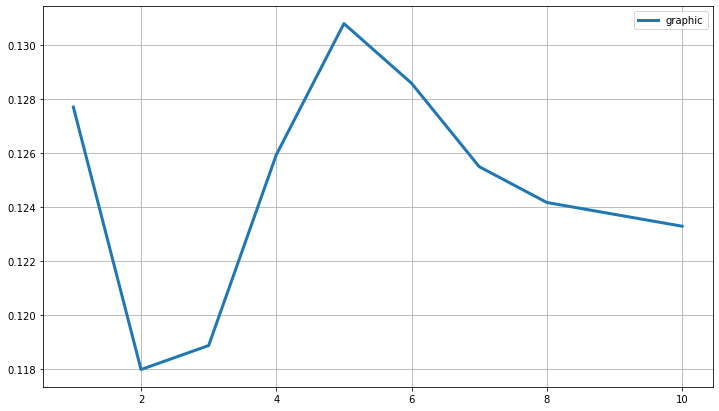

In [61]:
import matplotlib
x = [i for i in range(1, 11)]
plt.figure(figsize=(12, 7))
plt.plot(x, y, label='graphic', lw=3)
plt.legend()
plt.grid(True)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

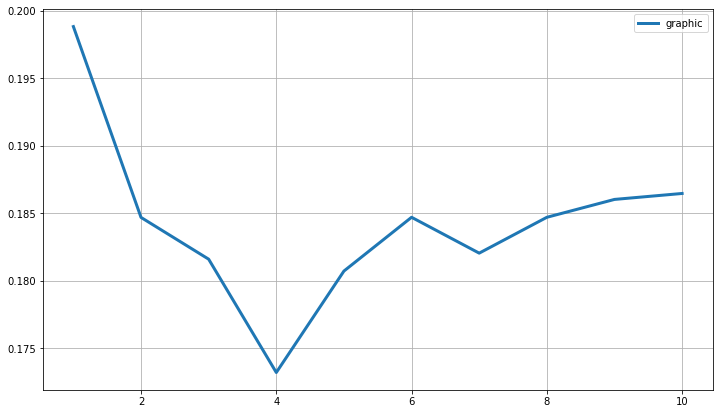

In [62]:
y = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    clf.fit(X_word_train, y_train)
    y.append(cross_validate(clf, X_word_test, y_test, cv=3)['test_score'].mean())
plt.figure(figsize=(12, 7))
plt.plot(x, y, label='graphic', lw=3)
plt.legend()
plt.grid(True)

Косинусная метрика лучше

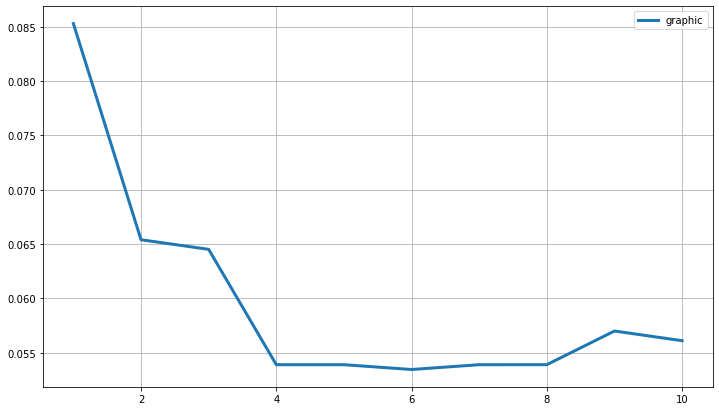

In [63]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_word_train)
X_test_tfidf = tfidf_transformer.fit_transform(X_word_test)
y = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_tfidf, y_train)
    y.append(cross_validate(clf, X_test_tfidf, y_test, cv=3)['test_score'].mean())
plt.figure(figsize=(12, 7))
plt.plot(x, y, label='graphic', lw=3)
plt.legend()
plt.grid(True)

Евклидова метрика для ТФ ИДФ сильно хуже

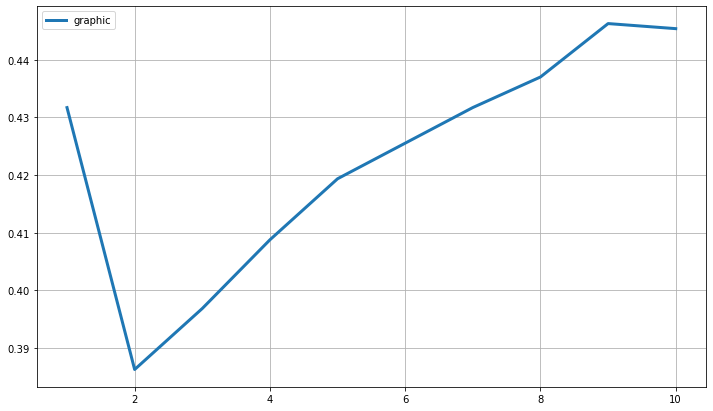

In [64]:
y = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    clf.fit(X_train_tfidf, y_train)
    y.append(cross_validate(clf, X_test_tfidf, y_test, cv=3)['test_score'].mean())
plt.figure(figsize=(12, 7))
plt.plot(x, y, label='graphic', lw=3)
plt.legend()
plt.grid(True)

Косинусная метрика для ТФ ИДФ значительно лучше

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [65]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [66]:
data = newsgroups['data']
target = newsgroups['target']

In [67]:
vectorizer = CountVectorizer(max_features=70_000)
X_t = vectorizer.fit_transform(data)

In [68]:
clf_best.score(X_t, target)

0.05284121083377589

Сильно отличается от кросс-валидации в худшую сторону. Думаю это из-за того, что тестовая выборка стала больше по размеру. Возможно, сказалось урезание количества признаков у датасета из-за из различий и не возможности протестировать на моей модели